In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn settings
sns.set_theme()
sns.set_context("talk")

# Palette
pal = 'crest'
my_cmap = sns.color_palette(pal, as_cmap=True)
my_pal = sns.color_palette(pal, 10)
sns.set_palette(my_pal)

In [2]:
# Broken with macOS Monteray
#from plot_scripts import import_data
#f_paths, f_dir = import_data()

In [3]:
# Load csvs
df1 = pd.read_csv(r'/Users/jack/Github/arbin/test_data/output/volt_params_cell_1.csv')
df2 = pd.read_csv(r'/Users/jack/Github/arbin/test_data/output/volt_params_cell_2.csv')
df3 = pd.read_csv(r'/Users/jack/Github/arbin/test_data/output/volt_params_cell_3.csv')

lst_df = [df1, df2, df3]
df_temp = pd.concat(lst_df)

# Add cell number column
for cell, df in enumerate(lst_df):
    new_col = np.zeros(df.shape[0], dtype=int)
    new_col += cell
    df.insert(0, 'cell', new_col)

# Concatenate cell dataframes
df_conc = pd.concat(lst_df)
df_conc.reset_index(drop=True,inplace=True)
df_conc['Q'] = df_conc['Qp_mAh'] + df_conc['Qn_mAh']
df_conc.drop(columns=['Qp_mAh','Qn_mAh'], inplace=True)

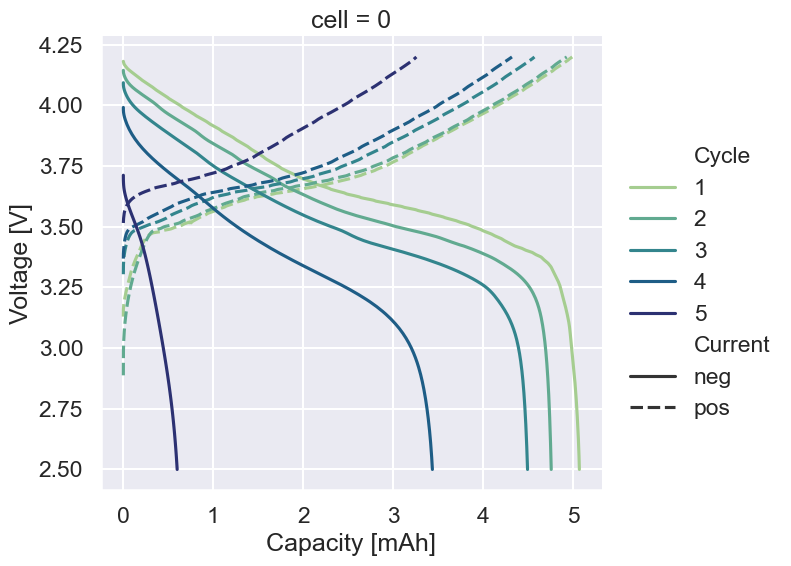

In [4]:
# Voltage plot parameters
step_type = ['neg','pos'] # 'pos' or 'neg' current step
cell_idx = [0]
cyc_idx = [1,2,3,4,5] #[1,2,3,4,5]

# Filter dataframe by parameters
df_plot = df_conc[(df_conc['cell'].isin(cell_idx)) &
                  (df_conc['step_type'].isin(step_type)) &
                  (df_conc['cycle'].isin(cyc_idx))]

# Ensure plot variable format
keywords = {}
if len(cyc_idx) > 1:
    keywords['palette'] = my_cmap 
    
# Plot voltage curves
g = sns.relplot(
                data=df_plot, x="Q", y="E", 
                hue='cycle', style='step_type', style_order=step_type,
                kind='line', height=6, aspect=1.1,
                facet_kws={'legend_out': True},
                col='cell',
                **keywords
                )

# Set axis titles
g.set(xlabel='Capacity [mAh]', ylabel='Voltage [V]')

# Convert legend subtitles
for text in g._legend.get_texts():
    if text.get_text() == 'cycle':
        text.set_text('Cycle')
    elif text.get_text() == 'step_type':
        text.set_text('Current')